Programming competition notebook: exploring efficient ways of solving a challenge of removing consecutive even numbers in a sequence

Thanks, Khuyen Tran (github.com/khuyentran1401) for timing pipelines

In [ ]:
import random
import time
from timeit import Timer

n = 100000
cds = [random.randint(0,10) for i in range(0,n)]

def evenpop(cards):

    n = len(cards)
    i = 0

    while i < n-1:
        if (cards[i]+cards[i+1]) % 2 == 0:
            cards.pop(i)
            cards.pop(i)
            n -= 2
            i -= 1
        i += 1
    
    rest = len(cards)

    return rest
    

In [ ]:
import random

def evenpop(cards):

    n = len(cards)
    i = 0

    while i < n-1:
        if (cards[i]+cards[i+1]) % 2 == 0:
            cards.pop(i)
            cards.pop(i)
            n -= 2
            i -= 1
        i += 1
    
    rest = len(cards)

    return rest

n = 100000
cds = [random.randint(0,10) for i in range(0,n)]
evenpop(cds)

In [ ]:
# Run worst case: all even numbers: should pop the whole list
evenpop([1 for j in range(0,100000)]) # runtime: ~1.9s

In [ ]:
# Run best case: all consecutive odd numbers: should pop none
evenpop(list(range(0,100000))) # runtime: ~0.1s

In [ ]:
import timeit
import numpy as np

# compute evenpop time
def evenpop_time():
	SETUP_CODE = '''
from __main__ import evenpop
import random
n = 100000
cds = [random.randint(0,10) for i in range(0,n)]'''
	
	TEST_CODE = '''
evenpop(cds)
	'''
	# timeit.repeat statement
	times = timeit.repeat(setup = SETUP_CODE,
						stmt = TEST_CODE,
						repeat = 10,
					    number = 1)

	# printing minimum exec. time
	print('Evenpop time: {}'.format(np.max(times))) #np.mean(times)

if __name__ == "__main__":
	evenpop_time()

The pop method is too slow: 1 second is the limit in the competition.

Below follows a simulated worst and best case comparison of runtime complexity:

In [ ]:
from timeit import Timer

# Worst case
evenpop_w = Timer("evenpop(cds_w)",
                'from __main__ import evenpop, cds_w')

# Best case
evenpop_b = Timer('evenpop(cds_b)',
                'from __main__ import evenpop, cds_b')

experiments = 1
result = []

for i in range(100000,1000000,100000):
    
    #Define the array
    
    cds_w = [1 for j in range(0,i)] # worst case: pop all
    cds_b = list(range(0,i)) # best case: none to pop
    
    #Time the average results of 1000 experiments for each method
    p_w = evenpop_w.timeit(number=experiments)
    p_b = evenpop_b.timeit(number=experiments)
    
    result.append((i,p_w,p_b))

print(result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

matrixDat = np.array( result )
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='pop_worst_case');
plt.plot(matrixDat[:,0], matrixDat[:,2], 'o', color='blue',label='pop_best_case');
leg = plt.legend(numpoints=1)

Something smarter: don't change the list, just count:

In [109]:
def evencount(cards):
    n = len(cards)
    rest = n
    i = 0
    prev = None

    while i < n-1:
        if (cards[i]+cards[i+1]) % 2 == 0:
            rest -= 2
            i += 2
            if i < n-1 and prev != None:
                if (prev + cards[i]) % 2 == 0:
                    rest -= 2
                    i += 1
        else:
            prev = cards[i]
            i += 1

    return rest

In [108]:
# Run worst case: all even numbers: should pop the whole list
evencount([1 for j in range(0,100000)]) # runtime: ~1.9s

0

In [110]:
import timeit
import numpy as np

# compute evencount time
def evencount_time():
	SETUP_CODE = '''
from __main__ import evencount
import random
n = 100000
cds = [random.randint(0,10) for i in range(0,n)]'''
	
	TEST_CODE = '''
evencount(cds)
	'''
	# timeit.repeat statement
	times = timeit.repeat(setup = SETUP_CODE,
						stmt = TEST_CODE,
						repeat = 10,
					    number = 1)

	# printing minimum exec. time
	print('Evencount time: {}'.format(np.max(times))) #np.mean(times)

if __name__ == "__main__":
	evencount_time()

Evencount time: 0.08533780000288971


In [111]:
from timeit import Timer

# Worst case
evencount_w = Timer("evencount(cds_w)",
                'from __main__ import evencount, cds_w')

# Best case
evencount_b = Timer('evencount(cds_b)',
                'from __main__ import evencount, cds_b')

experiments = 1
result = []

for i in range(100000,1000000,100000):
    
    #Define the array
    
    cds_w = [1 for j in range(0,i)] # worst case: pop all
    cds_b = list(range(0,i)) # best case: none to pop
    
    #Time the average results of 1000 experiments for each method
    p_w = evencount_w.timeit(number=experiments)
    p_b = evencount_b.timeit(number=experiments)
    
    result.append((i,p_w,p_b))

print(result)

[(100000, 0.08706869999878109, 0.12070529999618884), (200000, 0.11460229998920113, 0.17051370000990573), (300000, 0.1731551999982912, 0.20628579999902286), (400000, 0.1534998999995878, 0.4209533000102965), (500000, 0.2359540999896126, 0.30765300001075957), (600000, 0.2757666999968933, 0.3162568999978248), (700000, 0.24040460000105668, 0.32798089999414515), (800000, 0.48607139999512583, 0.46802369999932125), (900000, 0.4001282000099309, 0.4317677999933949)]


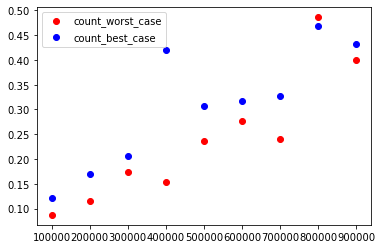

In [112]:
import numpy as np
import matplotlib.pyplot as plt

matrixDat = np.array( result )
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='count_worst_case');
plt.plot(matrixDat[:,0], matrixDat[:,2], 'o', color='blue',label='count_best_case');
leg = plt.legend(numpoints=1)

In [8]:
from collections import deque

cards = [2,4,6,8,10,12,14,16,18,20] # [1,3,3,4,2,4,1,3,7,1]
n = len(cards)
rest = n
i = 0
rest_stack = deque()

while i < n-1:
    if (cards[i]+cards[i+1]) % 2 == 0:
        rest -= 2
        i += 2
        if i < n-1 and rest_stack:
            prev = rest_stack.pop()
            if (prev + cards[i]) % 2 == 0:
                rest -= 2
                i += 1
            else:
                rest_stack.append(prev)
    else:
        rest_stack.append(cards[i])
        i += 1

print(rest)

0


In [5]:
from collections import deque
a = deque()
a.append(3)

print(a)

deque([3])
